In [1]:
import matplotlib.pyplot as plt
import numpy as np
import importlib
import os
import metrics
importlib.reload(metrics)

<module 'metrics' from 'c:\\Users\\nick\\Desktop\\RESO\\generators\\neural\\lstm\\metrics\\metrics.py'>

# What Are These Metrics?

<p1 style="font-family:'Arial';">

The model receives a sequence of notes (let's say about 100-200) and is tasked with continuing this sequence.

It generates a continuation based on the given sequence.

Initially, the predictions closely resemble the original work, resulting in a high level of similarity.

However, as more notes are generated, the model tends to diverge further from the original composition.

Hence, metrics gauge the similarity between the generated continuation and the original sequence.

These metrics are computed for various lengths of generated continuations.


Additionally, we calculate metrics for different models based on the number of epochs to assess <br>
whether well-trained models produce new sounds rather than simply replicating the original work (overfitting).</p1>

In [2]:
class ModelMetrics:

    def __init__ (self, composer: str):
        self.composer = composer
        COMPOSER_DIR = os.path.join(os.path.dirname(os.getcwd()), 'models', composer)
        self.model_paths = []
        for filename in os.listdir(COMPOSER_DIR):
            if filename.endswith('.keras'):
                filepath = os.path.join(COMPOSER_DIR, filename)
                self.model_paths.append(filepath)
        reso_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
        self.NOTES_PATH = os.path.join(reso_dir, 'data', composer, 'notes')
        self.N = 400
        self.index = 100

    def print_metrics(self):
        plt.style.use('classic')
        colors = plt.cm.viridis(np.linspace(0, 1, len(self.model_paths)))

        for model_path, color in zip(self.model_paths, colors):
            epochs = int(model_path[-9:-6])
            similarity_list, average_similarity = metrics.calculate_similarity(notes_path=self.NOTES_PATH, model_path=model_path, N=self.N, index=self.index)
            print(f"Average similarity after {epochs} epochs is {average_similarity}")
            plt.plot(list(range(self.N)), similarity_list, linestyle='-', color=color, label=epochs) 
            plt.grid(True)

        plt.legend()
        plt.xlabel('Number of notes')
        plt.ylabel('Similarity')
        plt.title(f'{self.composer} metrics')

### Metrics for Bach

Average similarity after 230 epochs is 0.40760269097222207
Average similarity after 270 epochs is 0.4626297309027773
Average similarity after 290 epochs is 0.4988258680555561


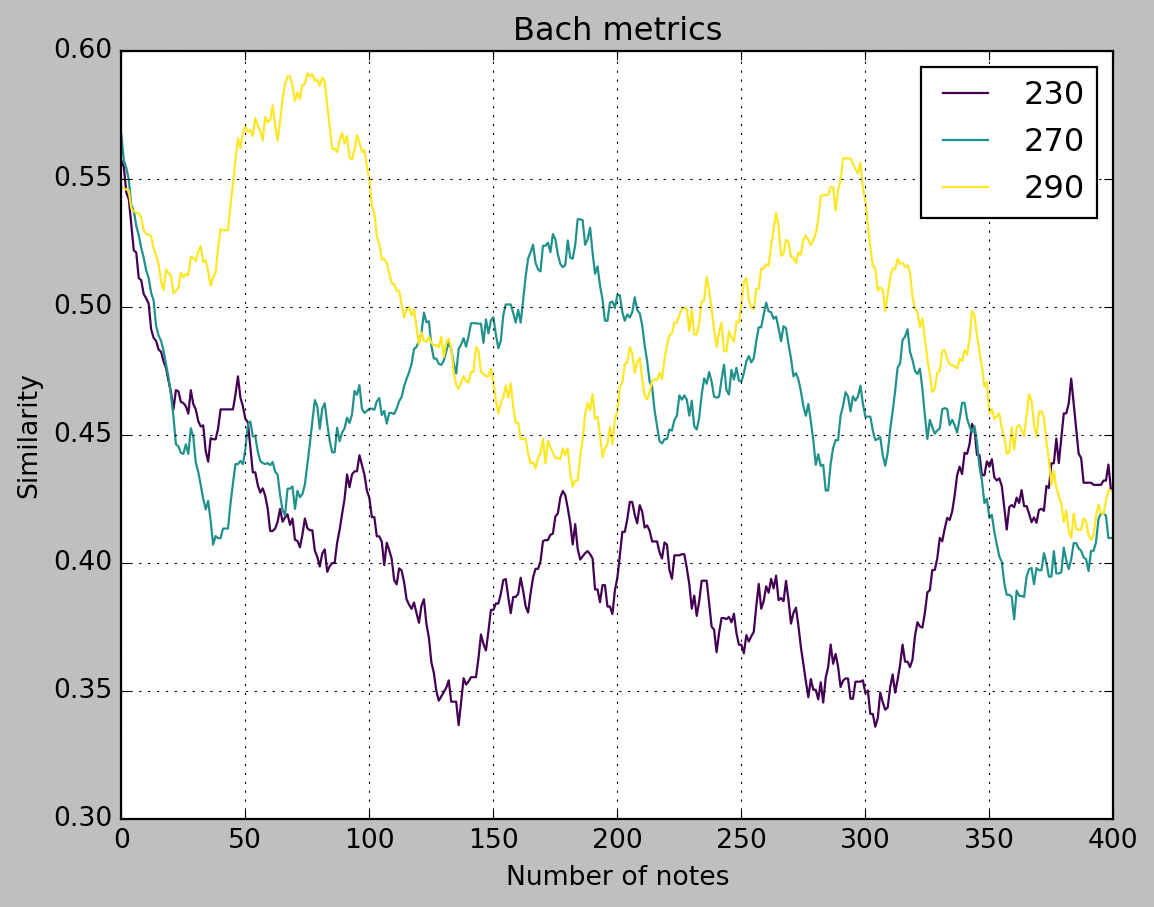

In [3]:
bach_metrics = ModelMetrics('Bach')
bach_metrics.print_metrics()

### Metrics for Chopin

Average similarity after 200 epochs is 0.3619491319444447
Average similarity after 250 epochs is 0.32370131655092604
Average similarity after 300 epochs is 0.3497289776837381
Average similarity after 350 epochs is 0.444617002360026


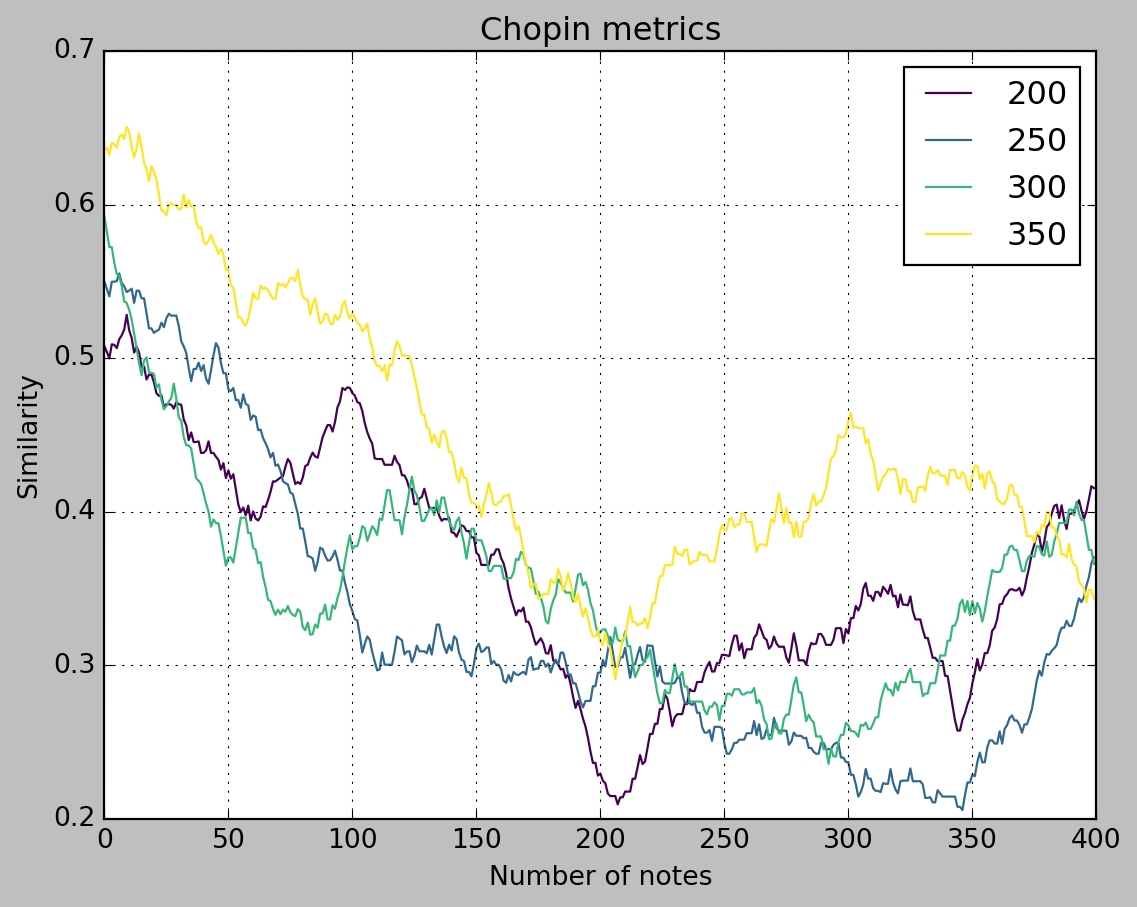

In [4]:
chopin_metrics = ModelMetrics('Chopin')
chopin_metrics.print_metrics()

### Metrics for Mozart

Average similarity after 151 epochs is 0.3004197126977241
Average similarity after 201 epochs is 0.4033881221064818
Average similarity after 251 epochs is 0.33585889395254676
Average similarity after 301 epochs is 0.31899380184220666


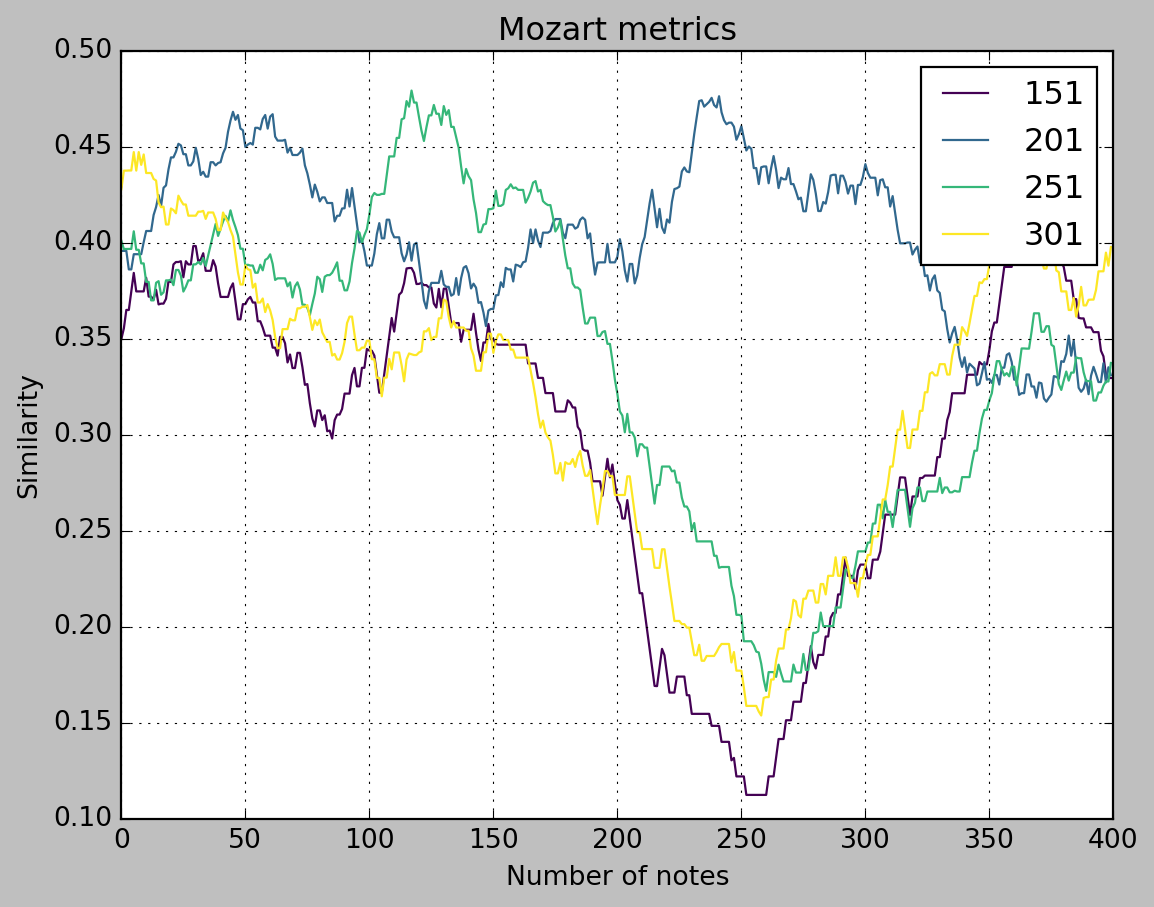

In [5]:
mozart_metrics = ModelMetrics('Mozart')
mozart_metrics.print_metrics()